In [1]:
import requests
import pandas
import matplotlib.pyplot as plt
from datetime import datetime
from io import BytesIO

In [2]:
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
r = requests.get(url)
data_frame = pandas.read_csv(BytesIO(r.content), parse_dates=True)
extracted_data = data_frame[['data' ,'deceduti']]

In [3]:
deceased_prev = 0
deceased = []

for i, row in extracted_data.iterrows():        
    deceased_now = row['deceduti']
    deceased_actually = deceased_now - deceased_prev
    deceased_prev = deceased_now
    deceased.append([datetime.strptime(row['data'][0:10], '%Y-%m-%d'), deceased_actually])

deceased_data_frame = pandas.DataFrame(deceased, columns=['data', 'deceduti'])

x = deceased_data_frame['data']
y = deceased_data_frame['deceduti']

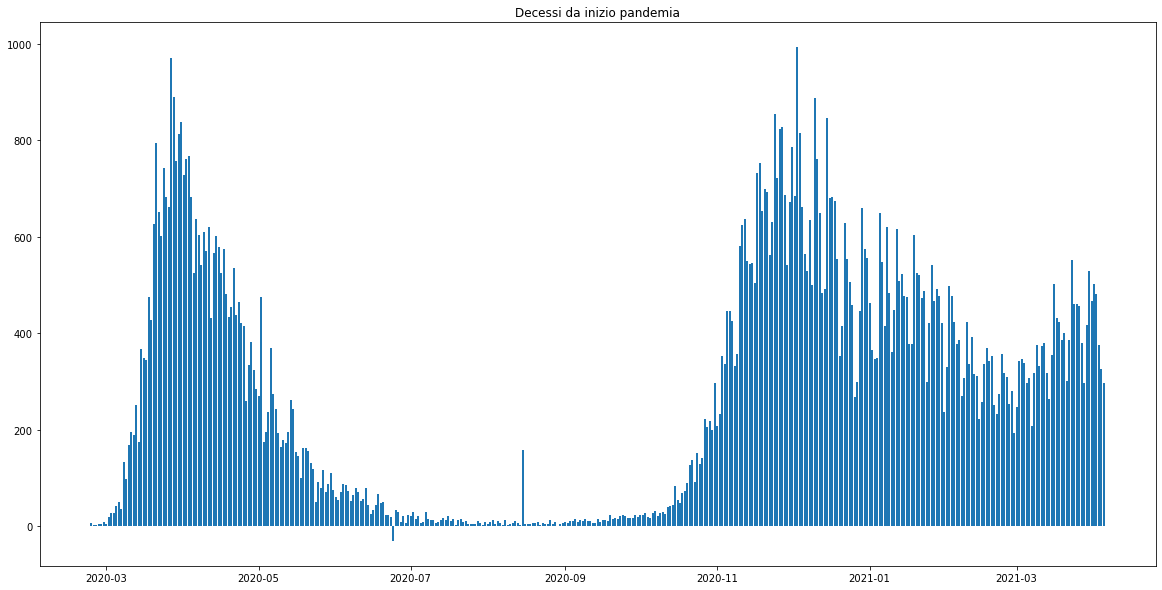

In [4]:
plt.figure(figsize=(20, 10))
plt.title('Decessi da inizio pandemia')
plt.bar(x, y)
plt.show()